# EDA de los alojamientos turísticos en Madrid (Airbnb)

En este notebook realizamos un **Análisis Exploratorio de Datos (EDA)** sobre los alojamientos turísticos de Madrid anunciados en Airbnb, utilizando el dataset `listings.csv` de Inside Airbnb.

**Objetivo del análisis**

- Entender cómo se distribuyen los precios por noche.
- Analizar el impacto de:
  - la **ubicación** (distritos / barrios),
  - el **tipo de alojamiento**,
  - la **capacidad (número de huéspedes)**

en el **precio por noche**.

Este notebook corresponde al archivo `main.ipynb` del proyecto `EDA_Alojamientos_turisticos_Madrid`.

## Carga y descripción del dataset

In [138]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy import stats

# Estilo de gráficos
plt.style.use("ggplot")
sns.set(rc={"figure.figsize": (10, 5)})

# Crear carpeta de imágenes si no existe
os.makedirs("src/img", exist_ok=True)

In [139]:
# Ruta al fichero de datos
ruta_datos = "src/data/listings.csv"

# Carga del dataset
df = pd.read_csv(ruta_datos, low_memory=False)

# Vistazo rápido
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
0,21853,Bright and airy room,83531.0,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,NaN,4.0,33.0,2018-07-15,0.25,2.0,198.0,0.0,;
1,30320,Apartamentos Dana Sol,130907.0,Danuta Weronika,Centro,Sol,40.41476,-3.70418,Entire home/apt,157.0,5.0,173.0,2025-08-27,0.93,17.0,342.0,1.0,;
2,30959,Beautiful loft in Madrid Center,132883.0,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3.0,8.0,2017-05-30,0.06,1.0,0.0,0.0,;
3,40916,Apartasol Apartamentos Dana,130907.0,Danuta Weronika,Centro,Universidad,40.42247,-3.70577,Entire home/apt,143.0,5.0,53.0,2025-09-11,0.29,17.0,341.0,4.0,;
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845.0,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,65.0,1.0,249.0,2025-09-05,2.78,3.0,299.0,41.0,;


## Limpieza y preparación de los datos 

In [140]:
# vemos los nulos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25094 entries, 0 to 25093
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25094 non-null  object 
 1   name                            22442 non-null  object 
 2   host_id                         22442 non-null  float64
 3   host_name                       22349 non-null  object 
 4   neighbourhood_group             22442 non-null  object 
 5   neighbourhood                   22442 non-null  object 
 6   latitude                        22442 non-null  float64
 7   longitude                       22442 non-null  float64
 8   room_type                       22442 non-null  object 
 9   price                           16931 non-null  float64
 10  minimum_nights                  22442 non-null  float64
 11  number_of_reviews               22442 non-null  float64
 12  last_review                     

In [141]:
# vemos la distribución estadística de las columnas numéricas
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.244200e+04,22442.000000,22442.000000,16931.000000,22442.000000,22442.00000,17670.000000,22442.000000,22442.000000,22442.000000
mean,2.858885e+08,40.422314,-3.693797,156.560924,9.177079,48.22948,1.771441,44.918011,170.118661,13.802157
std,2.211290e+08,0.023726,0.028252,515.152828,31.056931,91.87137,2.089466,94.580021,135.060740,22.177165
min,1.745300e+04,40.331440,-3.832060,8.000000,1.000000,0.00000,0.010000,1.000000,0.000000,0.000000
25%,6.565667e+07,40.409630,-3.707521,69.000000,1.000000,1.00000,0.340000,1.000000,21.000000,0.000000
50%,2.620778e+08,40.420837,-3.700854,109.000000,2.000000,10.00000,1.090000,4.000000,174.000000,3.000000
75%,4.764961e+08,40.432833,-3.683937,162.000000,4.000000,52.00000,2.600000,26.000000,304.000000,20.000000
max,7.184549e+08,40.533240,-3.545904,25654.000000,1125.000000,1184.00000,82.940000,407.000000,365.000000,393.000000


In [142]:
# eliminamos directamente las filas con 10 o más nulos
df = df[df.isna().sum(axis=1) <= 10]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22442 entries, 0 to 25093
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22442 non-null  object 
 1   name                            22442 non-null  object 
 2   host_id                         22442 non-null  float64
 3   host_name                       22349 non-null  object 
 4   neighbourhood_group             22442 non-null  object 
 5   neighbourhood                   22442 non-null  object 
 6   latitude                        22442 non-null  float64
 7   longitude                       22442 non-null  float64
 8   room_type                       22442 non-null  object 
 9   price                           16931 non-null  float64
 10  minimum_nights                  22442 non-null  float64
 11  number_of_reviews               22442 non-null  float64
 12  last_review                     17670

In [143]:
# vemos los nulos en host_name
df[df["host_name"].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
743,6899113,Habitación en Vallehermoso,36068881.0,NaN,Chamberí,Vallehermoso,40.438820,-3.706190,Private room,NaN,1.0,0.0,NaN,NaN,1.0,0.0,0.0,;
854,7712666,LINDO APARTAMENTO MUY BIEN SITUADO,40516896.0,NaN,Tetuán,Castillejos,40.462600,-3.690190,Entire home/apt,NaN,7.0,0.0,NaN,NaN,1.0,0.0,0.0,;
978,8963605,loft cerca de atocha,46845753.0,NaN,Puente de Vallecas,San Diego,40.395250,-3.668770,Entire home/apt,NaN,1.0,0.0,NaN,NaN,1.0,0.0,0.0,;
3210,22943516,A3 Comfortable And Pleasant Apartment In Madrid,91506664.0,NaN,Centro,Embajadores,40.405418,-3.701753,Entire home/apt,100.0,2.0,174.0,2025-08-25,1.88,16.0,329.0,15.0,H28391AAV68;
3211,22943847,A5 Comfortable And Pleasant Apartment In Madrid,91506664.0,NaN,Centro,Embajadores,40.405708,-3.701652,Entire home/apt,95.0,2.0,121.0,2025-03-23,1.31,16.0,317.0,6.0,H28391AAV68;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24436,1471538723582381999,Apartamento en Noviciado,518331793.0,NaN,Centro,Universidad,40.425558,-3.705515,Entire home/apt,241.0,1.0,7.0,2025-08-31,6.18,53.0,0.0,7.0,ESFCTU00000304400021559900000000000000000VT-50...
24437,1471610422615046582,Apartamento en Noviciado 2,518331793.0,NaN,Centro,Universidad,40.425558,-3.705515,Entire home/apt,327.0,1.0,7.0,2025-08-30,6.56,53.0,0.0,7.0,ESFCTU00000304400021559900000000000000000VT-50...
24807,1496936866768919379,Aparta-Estudio en Plaza Mayor,91506664.0,NaN,Centro,Sol,40.414688,-3.707189,Entire home/apt,143.0,1.0,0.0,NaN,NaN,16.0,323.0,0.0,ESHFNT0000280910004794110010000000000000000000...
25062,1506426210772187082,Studio in Plaza Callao Madrid,91506664.0,NaN,Centro,Universidad,40.421598,-3.706432,Entire home/apt,123.0,2.0,0.0,NaN,NaN,16.0,314.0,0.0,ESHFNT0000281080000856480020000000000000000000...


In [144]:
# rellenamos los nulos de host_name con desconocido para no perder información
df["host_name"] = df["host_name"].fillna("Desconocido")

In [145]:
# mostramos host name por pantalla
df["host_name"].value_counts()

host_name
Francisco Andres    462
Home Club           416
Ukio                381
Jorge               339
MIT House           334
                   ... 
Roi                   1
Gustavo Miguel        1
Dunia Dalila          1
Edelmira              1
Tatiana Camila        1
Name: count, Length: 3648, dtype: int64

In [146]:
# volvemos a mirar los nulos de las columnas
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 22442 entries, 0 to 25093
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22442 non-null  object 
 1   name                            22442 non-null  object 
 2   host_id                         22442 non-null  float64
 3   host_name                       22442 non-null  object 
 4   neighbourhood_group             22442 non-null  object 
 5   neighbourhood                   22442 non-null  object 
 6   latitude                        22442 non-null  float64
 7   longitude                       22442 non-null  float64
 8   room_type                       22442 non-null  object 
 9   price                           16931 non-null  float64
 10  minimum_nights                  22442 non-null  float64
 11  number_of_reviews               22442 non-null  float64
 12  last_review                     17670

In [147]:
# vemos los nulos de la columna license
df[df["license;"].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
427,3712285,Hipster style & perfect location ;),18396400.0,Daniel,Centro,Embajadores,40.411000,-3.703280,Entire home/apt,NaN,300.0,10.0,2018-06-10,0.08,1.0,83.0,0.0,NaN
18175,1201433668441586580,Penthouse 3 B Boutique Duplex terraces; 3-4 pe...,589559365.0,Daniel,Puente de Vallecas,Numancia,40.401340,-3.663700,Entire home/apt,147.0,1.0,5.0,2025-09-05,0.45,5.0,73.0,5.0,NaN
18178,1201446110425479538,1 Apartament Atico 3º A (nº 6); up to 4-6 guest,589559365.0,Daniel,Puente de Vallecas,Numancia,40.401830,-3.664570,Entire home/apt,139.0,2.0,9.0,2025-08-21,1.37,5.0,62.0,9.0,NaN
18179,1201449248718083992,Boutique Apartment Entreplanta (nº 1); 3-5 guest,589559365.0,Daniel,Puente de Vallecas,Numancia,40.400810,-3.664490,Entire home/apt,145.0,1.0,3.0,2025-05-12,0.27,5.0,72.0,3.0,NaN
18180,1201452489545612646,Studio Apartment 1ºB (nº3) or 2ºB (nº5); 2-4 g...,589559365.0,Daniel,Puente de Vallecas,Numancia,40.401340,-3.663700,Entire home/apt,130.0,1.0,10.0,2025-07-06,0.91,5.0,80.0,10.0,NaN
21996,1380771706672353061,Luxury Collection; Conde de Aranda,5697443.0,The Everywhere Home,Salamanca,Recoletos,40.422244,-3.686983,Entire home/apt,1725.0,3.0,0.0,NaN,NaN,7.0,107.0,0.0,NaN
22218,1390793860643108945,San Blas Apartment; Pool and Padel for 4 Guests.,687823325.0,Natalia,San Blas - Canillejas,Simancas,40.439161,-3.617413,Entire home/apt,97.0,1.0,25.0,2025-09-03,5.03,1.0,351.0,25.0,NaN


In [148]:
# mostramos la columna license y sus valores
df["license;"].value_counts()

license;
;                                                         14266
Exempt;                                                     603
En proceso;                                                 276
ESABCD123456789123456789123456789123456-HH-7891234567;       49
350202309690;                                                27
                                                          ...  
ESFCTU00002811800046654500000000000000000000VT-143906;        1
ESFCTU00000607000021559700000000000000000VT-509234-A1;        1
ESFCNT00002810400043401100000000000000000000000000007;        1
ESFCTU000028091000091767000000000000000000000VT130756;        1
ESFCNT00002810900032334100000000000000000000000000005;        1
Name: count, Length: 6101, dtype: int64

In [149]:
# llenamos la columna license con desconocido para no perder valores
df["license;"]=df["license;"].fillna("desconocido")

In [150]:
# mostramos los nulos restantes de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22442 entries, 0 to 25093
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22442 non-null  object 
 1   name                            22442 non-null  object 
 2   host_id                         22442 non-null  float64
 3   host_name                       22442 non-null  object 
 4   neighbourhood_group             22442 non-null  object 
 5   neighbourhood                   22442 non-null  object 
 6   latitude                        22442 non-null  float64
 7   longitude                       22442 non-null  float64
 8   room_type                       22442 non-null  object 
 9   price                           16931 non-null  float64
 10  minimum_nights                  22442 non-null  float64
 11  number_of_reviews               22442 non-null  float64
 12  last_review                     17670

In [151]:
# eliminamos las filas que tengan nulos en el precio, ya que es la variable principal
df_precios = df[df["price"].isna()==False]

df_precios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16931 entries, 1 to 25093
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16931 non-null  object 
 1   name                            16931 non-null  object 
 2   host_id                         16931 non-null  float64
 3   host_name                       16931 non-null  object 
 4   neighbourhood_group             16931 non-null  object 
 5   neighbourhood                   16931 non-null  object 
 6   latitude                        16931 non-null  float64
 7   longitude                       16931 non-null  float64
 8   room_type                       16931 non-null  object 
 9   price                           16931 non-null  float64
 10  minimum_nights                  16931 non-null  float64
 11  number_of_reviews               16931 non-null  float64
 12  last_review                     14022

In [152]:
# rellenamos los nulos de reviews_per_month con 0 ya que en el dataframe parecen ser anuncios sin reviews
df_precios["reviews_per_month"] = df_precios["reviews_per_month"].fillna(0)
df_precios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16931 entries, 1 to 25093
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16931 non-null  object 
 1   name                            16931 non-null  object 
 2   host_id                         16931 non-null  float64
 3   host_name                       16931 non-null  object 
 4   neighbourhood_group             16931 non-null  object 
 5   neighbourhood                   16931 non-null  object 
 6   latitude                        16931 non-null  float64
 7   longitude                       16931 non-null  float64
 8   room_type                       16931 non-null  object 
 9   price                           16931 non-null  float64
 10  minimum_nights                  16931 non-null  float64
 11  number_of_reviews               16931 non-null  float64
 12  last_review                     14022

C:\Users\javie\AppData\Local\Temp\ipykernel_20148\879413039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precios["reviews_per_month"] = df_precios["reviews_per_month"].fillna(0)


In [153]:
# la columna last_review va a continuar con los nulos, usaremos un filtro para deshacernos de los nulos cuando queramos usarla
# para un análisis, no es una columna tan relevante como para eliminar las filas con nulos, pero tampoco es tan irrelevante como 
# para eliminar la columna directamente.

In [ ]:
# Pasamos la columna last review a datatime
df_precios["last_review"] = pd.to_datetime(df_precios["last_review"])

C:\Users\javie\AppData\Local\Temp\ipykernel_20148\2504254851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precios["last_review"] = pd.to_datetime(df_precios["last_review"])


In [155]:
df_precios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16931 entries, 1 to 25093
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              16931 non-null  object        
 1   name                            16931 non-null  object        
 2   host_id                         16931 non-null  float64       
 3   host_name                       16931 non-null  object        
 4   neighbourhood_group             16931 non-null  object        
 5   neighbourhood                   16931 non-null  object        
 6   latitude                        16931 non-null  float64       
 7   longitude                       16931 non-null  float64       
 8   room_type                       16931 non-null  object        
 9   price                           16931 non-null  float64       
 10  minimum_nights                  16931 non-null  float64       
 11  number_

In [156]:
df_precios.to_csv("src/data/df_precios.csv", index=False)

## Análisis exploratorio

In [157]:
# ahora vamos a generar la tabla de variables, para priorizarlas según su importancia con el estudio

In [158]:
# Ruta al fichero de datos
ruta_datos = "src/data/df_precios.csv"

# Carga del dataset
df = pd.read_csv(ruta_datos, low_memory=False, index_col="id")

# Vistazo rápido
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
id,,,,,,,,,,,,,,,,,
30320,Apartamentos Dana Sol,130907.0,Danuta Weronika,Centro,Sol,40.41476,-3.70418,Entire home/apt,157.0,5.0,173.0,2025-08-27,0.93,17.0,342.0,1.0,;
40916,Apartasol Apartamentos Dana,130907.0,Danuta Weronika,Centro,Universidad,40.42247,-3.70577,Entire home/apt,143.0,5.0,53.0,2025-09-11,0.29,17.0,341.0,4.0,;
62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845.0,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,65.0,1.0,249.0,2025-09-05,2.78,3.0,299.0,41.0,;
70073,Adorable Apartment Malasaña-Gran Via,353738.0,Raquel,Centro,Universidad,40.42252,-3.70250,Entire home/apt,116.0,30.0,36.0,2025-04-27,0.21,4.0,305.0,1.0,;
72150,Sunny attic duplex flat with terrace next to Sol,364585.0,Vin,Centro,Embajadores,40.41150,-3.70449,Entire home/apt,300.0,3.0,133.0,2025-06-08,0.75,4.0,180.0,15.0,VT-6993;


In [159]:
df["name"].value_counts()

name
Habitación en piso compartido           179
Habitación con baño privado              20
Habitación piso compartido               16
Dobo SB20 2Pax 1Bth                      14
Habitacion en piso compartido            12
                                       ... 
SBV-2E Aparamento en Madrid centro        1
SBV-2F Estudio privado en Palacio         1
SBV-2G Estudio privado en Palacio         1
SBV-2H Aparamento en Madrid centro        1
Adorable Apartment Malasaña-Gran Via      1
Name: count, Length: 15689, dtype: int64

In [160]:
df["host_id"].value_counts()

host_id
438136382.0    330
346367515.0    321
377605855.0    265
291253690.0    252
518713670.0    227
              ... 
967721.0         1
1004721.0        1
503508081.0      1
52975897.0       1
717010228.0      1
Name: count, Length: 6228, dtype: int64

In [161]:
df["host_name"].value_counts()

host_name
Francisco Andres    440
Home Club           348
Ukio                321
Jorge               272
MIT House           265
                   ... 
Giselangel Sarai      1
Eymmy  Dayan          1
Maria Francisca       1
Mia Gem               1
Jose Joaquin          1
Name: count, Length: 2672, dtype: int64

In [162]:
df["neighbourhood_group"].value_counts()

neighbourhood_group
Centro                   7145
Tetuán                   1199
Salamanca                1166
Chamberí                 1078
Arganzuela                789
Retiro                    664
Carabanchel               612
Chamartín                 604
Ciudad Lineal             568
Puente de Vallecas        504
Moncloa - Aravaca         465
Latina                    394
Usera                     361
Hortaleza                 359
San Blas - Canillejas     338
Fuencarral - El Pardo     209
Villaverde                157
Moratalaz                 107
Barajas                    85
Villa de Vallecas          69
Vicálvaro                  58
Name: count, dtype: int64

In [163]:
df["neighbourhood"].value_counts()

neighbourhood
Embajadores      1763
Universidad      1508
Palacio          1311
Sol               993
Justicia          845
                 ... 
Fuentelareina       4
Palomas             3
El Pardo            2
Horcajo             2
Atalaya             1
Name: count, Length: 128, dtype: int64

In [164]:
df["latitude"].value_counts()

latitude
40.421650    23
40.433699    21
40.455063    21
40.411418    18
40.422390    16
             ..
40.426456     1
40.405909     1
40.439282     1
40.428990     1
40.440630     1
Name: count, Length: 11956, dtype: int64

In [165]:
df["longitude"].value_counts()

longitude
-3.707000    26
-3.672267    21
-3.700565    21
-3.714655    18
-3.718249    14
             ..
-3.691450     1
-3.689780     1
-3.676530     1
-3.630673     1
-3.668777     1
Name: count, Length: 11507, dtype: int64

In [166]:
df["room_type"].value_counts()

room_type
Entire home/apt    12099
Private room        4668
Shared room          131
Hotel room            33
Name: count, dtype: int64

In [167]:
df["price"].value_counts()

price
90.0      196
80.0      157
85.0      148
100.0     147
110.0     145
         ... 
4600.0      1
909.0       1
589.0       1
971.0       1
1524.0      1
Name: count, Length: 690, dtype: int64

In [168]:
df["minimum_nights"].value_counts()

minimum_nights
1.0      7580
2.0      3049
3.0      1730
30.0      990
31.0      650
         ... 
63.0        1
59.0        1
55.0        1
366.0       1
270.0       1
Name: count, Length: 67, dtype: int64

In [169]:
df["number_of_reviews"].value_counts()

number_of_reviews
0.0      2909
1.0      1096
2.0       768
3.0       551
4.0       437
         ... 
406.0       1
379.0       1
776.0       1
585.0       1
393.0       1
Name: count, Length: 593, dtype: int64

In [170]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
id,,,,,,,,,,,,,,,,,
30320,Apartamentos Dana Sol,130907.0,Danuta Weronika,Centro,Sol,40.41476,-3.70418,Entire home/apt,157.0,5.0,173.0,2025-08-27,0.93,17.0,342.0,1.0,;
40916,Apartasol Apartamentos Dana,130907.0,Danuta Weronika,Centro,Universidad,40.42247,-3.70577,Entire home/apt,143.0,5.0,53.0,2025-09-11,0.29,17.0,341.0,4.0,;
62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845.0,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,65.0,1.0,249.0,2025-09-05,2.78,3.0,299.0,41.0,;
70073,Adorable Apartment Malasaña-Gran Via,353738.0,Raquel,Centro,Universidad,40.42252,-3.70250,Entire home/apt,116.0,30.0,36.0,2025-04-27,0.21,4.0,305.0,1.0,;
72150,Sunny attic duplex flat with terrace next to Sol,364585.0,Vin,Centro,Embajadores,40.41150,-3.70449,Entire home/apt,300.0,3.0,133.0,2025-06-08,0.75,4.0,180.0,15.0,VT-6993;


In [171]:
df["last_review"].value_counts()

last_review
2025-08-31    698
2025-09-07    448
2025-08-30    367
2025-09-08    341
2025-09-01    331
             ... 
2025-02-05      1
2025-02-13      1
2024-12-18      1
2024-10-16      1
2024-11-01      1
Name: count, Length: 1009, dtype: int64

In [172]:
df["reviews_per_month"].value_counts()

reviews_per_month
0.00     2909
1.00      219
0.07      107
0.06      104
0.04       96
         ... 
14.45       1
7.94        1
13.39       1
8.04        1
12.75       1
Name: count, Length: 952, dtype: int64

In [173]:
df["calculated_host_listings_count"].value_counts()

calculated_host_listings_count
1.0      3977
2.0      1671
3.0      1017
4.0       757
5.0       665
         ... 
40.0       26
66.0       23
47.0       14
249.0       5
170.0       2
Name: count, Length: 74, dtype: int64

In [174]:
df["availability_365"].value_counts()

availability_365
365.0    409
364.0    252
0.0      176
269.0    168
257.0    158
        ... 
200.0     14
213.0     13
186.0     13
209.0     12
210.0     10
Name: count, Length: 366, dtype: int64

In [175]:
df["number_of_reviews_ltm"].value_counts()

number_of_reviews_ltm
0.0      4117
1.0      1186
2.0       852
3.0       675
4.0       559
         ... 
135.0       1
294.0       1
121.0       1
193.0       1
393.0       1
Name: count, Length: 166, dtype: int64

In [176]:
df["license;"].value_counts()

license;
;                                                         9419
Exempt;                                                    557
En proceso;                                                263
ESABCD123456789123456789123456789123456-HH-7891234567;      47
350202309690;                                               26
                                                          ... 
ESFCTU00002811800046654500000000000000000000VT-143906;       1
ESFCTU00000607000021559700000000000000000VT-509234-A1;       1
ESFCNT00002810400043401100000000000000000000000000007;       1
ESFCTU000028091000091767000000000000000000000VT130756;       1
ESHFTU00002809100021160800300000000000000000000000004;       1
Name: count, Length: 5568, dtype: int64

| Nombre del campo                  | Descripción                                                                 | Tipo de variable | Importancia Inicial | Notas |
|-----------------------------------|----------------------------------------------------------------------------|------------------|---------------------|-------|
| id                          | ID del piso                                                             |  objeto                |       0              |       |
| name                             | nombre del apartamento                                                            | objeto                 |   0                  |       |
| host_id           | id del dueño   | objeto|           0          |       |
| host_name                          | nombre del dueño                       |   objeto               |   0                  |       |
| neighbourhood_group                         | barrio                                                | categórica                 |         2            |       |
| neighbourhood                 | calle                                                             |  objeto                |          4           |       |
| latitude                  | latitud                                                 | numérica float                |     4                |       |
| longitude                            | longitud                                                       |  numérica float               |      4               |       |
| room_type                            | tipo de alojamiento                                                      |   categórica               |     2                |       |
| price                     | precio por noche                                           |numérica float               |    1                 |       |
| minimun_nights                    | noches mínimas                                                |   numerica int               |          3           |       |
| last_review              | fecha de la última review                                                       | datetime                 |           4          |       |
| reviews_per_month           | número de reviews por mes                                            |  numérica float                |         3            |       |
| calculated_host_listings     | número de anuncios que tiene un mismo host                                                      |  numérica int               |          2           |       |
| availability_365         | disponibilidad al año     | numérica int| 4
| number_of_reviews_ltm                | número de reseñas en los últimos 12 meses                                                    | númerica int                 |   2                  |       |
| license;                | licencia, id                                                         | objeto                 |        0             |       |
| number_of_reviews                | número de reviews totales                                                        | numérica int                 |        3             |       |


## Análisis univariante, bivariante y geográfico 

**Hipótesis 1: Las diferencias de precio entre los alojamientos turísticos en Madrid pueden explicarse principalmente por la ubicación, el tipo de alojamiento, las características del anuncio y la época del año.**


In [177]:
precio_mediano = (
    df.groupby("neighbourhood_group")["price"]
    .median()
    .sort_values(ascending=False))

**En los siguientes gráficos vamos a representar los precios de los alojamientos en base al distrito, en el primero a través de la mediana, en el segundo a través de una distribución de caja, para observar visualmente si hay diferencias de precio significativas en base a la ubicación**

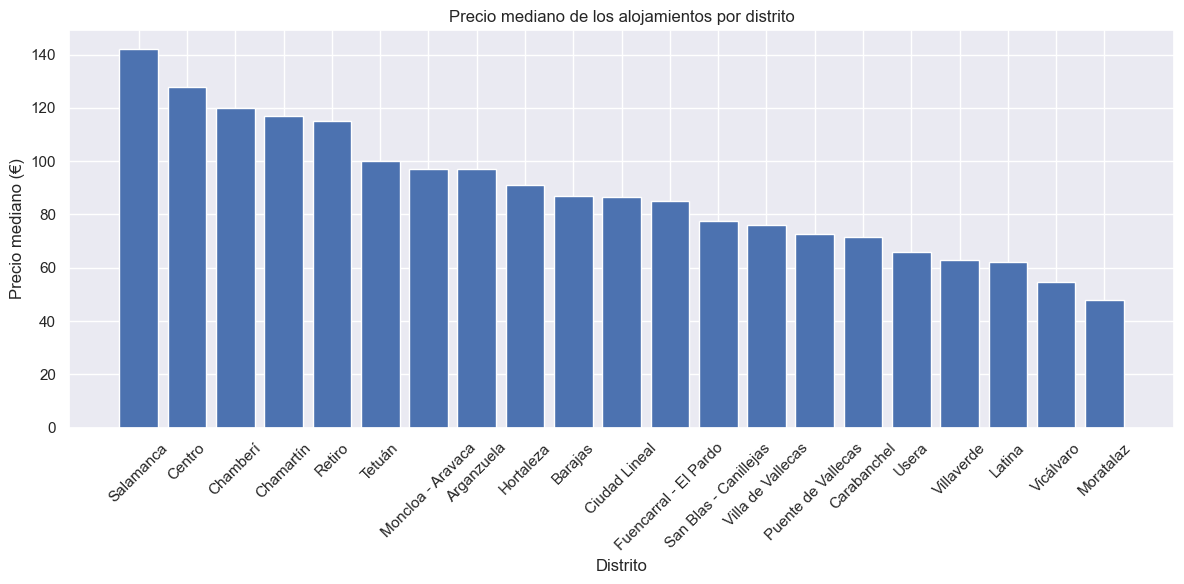

In [178]:
# lo primero es ver si realmente hay una relación entre la variable ubicación y la variable precio
plt.figure(figsize=(12,6))
plt.bar(precio_mediano.index, precio_mediano.values)
plt.title("Precio mediano de los alojamientos por distrito")
plt.xlabel("Distrito")
plt.ylabel("Precio mediano (€)")
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\javie\AppData\Local\Temp\ipykernel_20148\1687824702.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


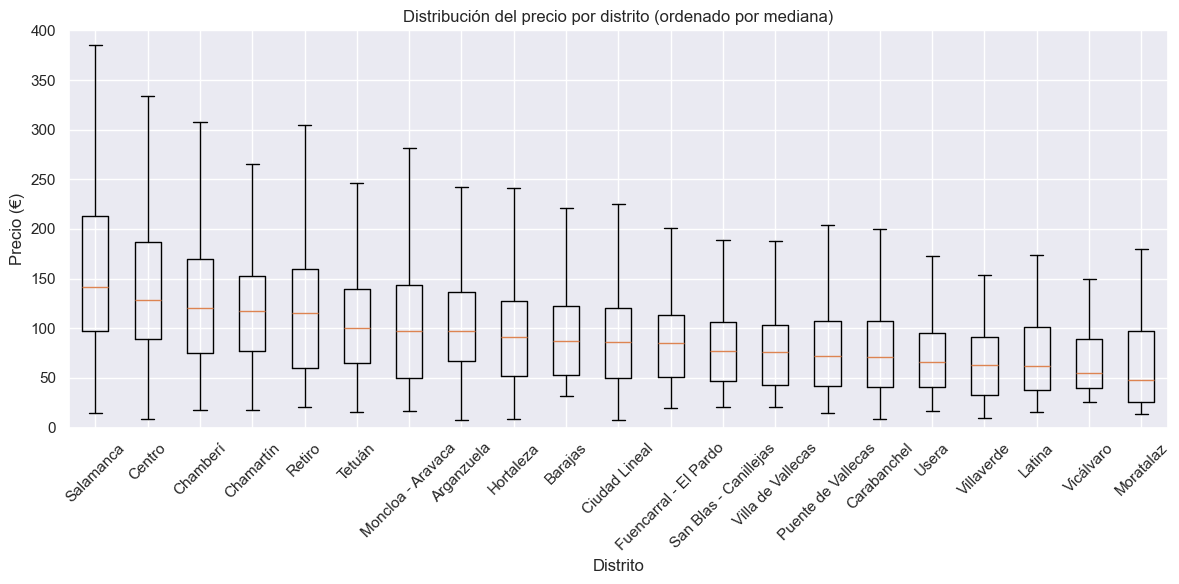

In [179]:
# Ordenar distritos por precio mediano
order = (
    df.groupby("neighbourhood_group")["price"]
    .median()
    .sort_values(ascending=False)
    .index
)
# Crear boxplot claro
plt.figure(figsize=(12,6))
plt.boxplot(
    [df[df["neighbourhood_group"] == d]["price"] for d in order],
    labels=order,
    showfliers=False
)
plt.ylim(0, 400)
plt.title("Distribución del precio por distrito (ordenado por mediana)")
plt.xlabel("Distrito")
plt.ylabel("Precio (€)")
plt.xticks(rotation=45)
plt.tight_layout()

**A continuación vamos a extraer la tabla de estadísticos del precio por barrio, para obtener los datos cuantitativos, y vamos a realizar la prueba de hipótesis, para confirmar si realmente la relación entre precio y distrito es significativa**

In [180]:
# mostramos los valores estadísticos del precio por distrito y los almacenamos en una tabla
df.groupby("neighbourhood_group")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Arganzuela,789.0,124.186312,283.133302,8.0,67.00,97.0,137.00,7623.0
Barajas,85.0,106.305882,91.385372,32.0,53.00,87.0,122.00,638.0
Carabanchel,612.0,93.668301,122.913936,9.0,41.00,71.5,107.00,1184.0
Centro,7145.0,185.517285,601.016039,9.0,89.00,128.0,187.00,25654.0
Chamartín,604.0,128.925497,106.088918,18.0,77.00,117.0,152.25,1522.0
Chamberí,1078.0,141.170686,118.364083,18.0,75.00,120.0,170.00,1400.0
Ciudad Lineal,568.0,111.095070,155.830623,8.0,50.00,86.5,120.25,2100.0
Fuencarral - El Pardo,209.0,109.990431,123.750524,20.0,51.00,85.0,113.00,1000.0
Hortaleza,359.0,149.348189,470.881087,9.0,51.50,91.0,127.50,8000.0


In [181]:
# hacemos la prueba estadística para comprobar si realmente hay una relación significativa entre el precio y el barrio
grupos = [g['price'] for name, g in df.groupby('neighbourhood')]
f,p = stats.f_oneway(*grupos)

print("F-estadístico:", f)
print("p-valor:", p)

F-estadístico: 1.6512045317523827
p-valor: 6.030215206814661e-06


**A continuación, debemos realizar la misma comprobación para el tipo de alojamiento, de la misma manera, vamos a generar gráficos de cajas y uno de barras para observar visualmente si los precios dependen del tipo de alojamiento**

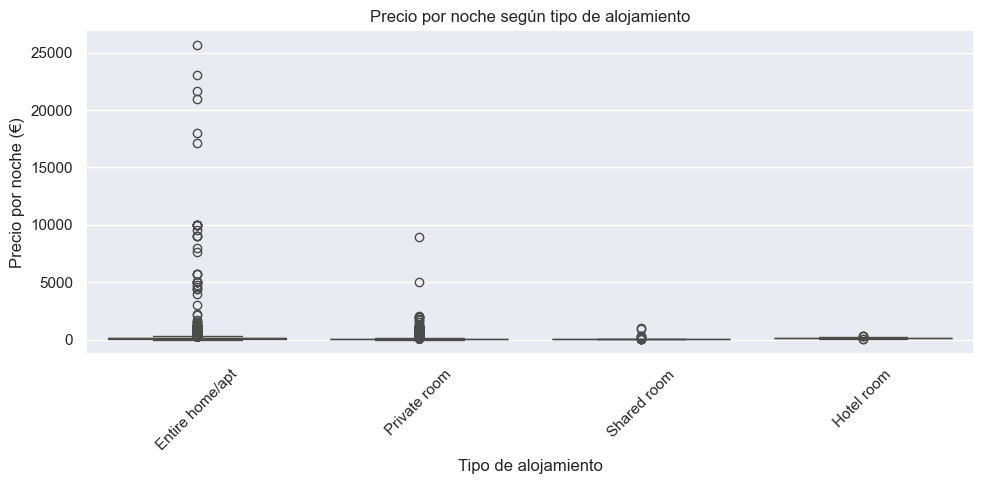

In [182]:
# lo siguiente es ver si hay diferencias en base al tipo de alojamiento

if "room_type" in df.columns:
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x="room_type", y="price", ax=ax)
    ax.set_title("Precio por noche según tipo de alojamiento")
    ax.set_xlabel("Tipo de alojamiento")
    ax.set_ylabel("Precio por noche (€)")
    plt.xticks(rotation=45)

    fig.tight_layout()
    fig.savefig("src/img/boxplot_tipo.png", dpi=300)
    plt.show()

    # Resumen por tipo de alojamiento
    resumen_tipo = df.groupby("room_type")["price"].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)
    resumen_tipo

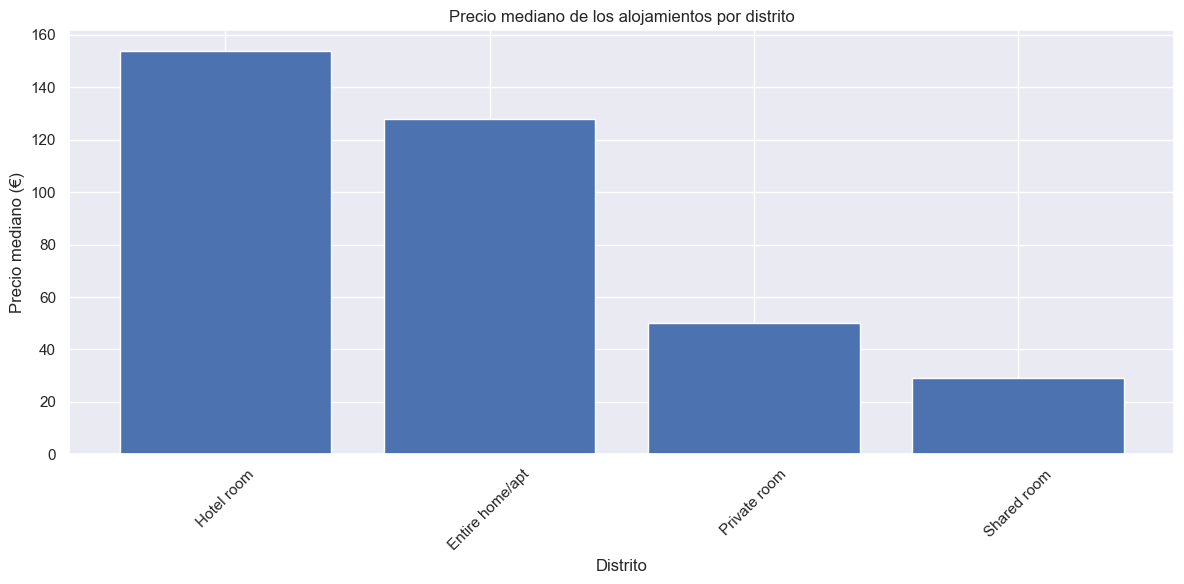

In [183]:
precio_mediano2 = (
    df.groupby("room_type")["price"]
    .median()
    .sort_values(ascending=False))

plt.figure(figsize=(12,6))
plt.bar(precio_mediano2.index, precio_mediano2.values)
plt.title("Precio mediano de los alojamientos por distrito")
plt.xlabel("Distrito")
plt.ylabel("Precio mediano (€)")
plt.xticks(rotation=45)
plt.tight_layout()

**De la misma manera que con respecto al distrito, extraemos la tabla de estadísticos para tener los valores cuantitativos, y posteriormente realizamos una prueba de hipótesis para confirmar que la relación entre las variables es estadísticamente significativa**

In [184]:
# mostramos los valores estadísticos del precio por tipo de alojamiento y los almacenamos en una tabla
df.groupby("room_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,12099.0,185.415076,594.726278,9.0,95.0,128.0,181.0,25654.0
Hotel room,33.0,156.030303,69.262853,31.0,130.0,154.0,180.0,347.0
Private room,4668.0,84.696230,194.298687,8.0,36.0,50.0,80.0,8900.0
Shared room,131.0,52.557252,121.836660,15.0,25.0,29.0,40.0,1000.0


In [185]:
# hacemos la prueba estadística para comprobar si realmente hay una relación significativa entre el precio y el tipo de alojamiento
df["log_price"] = np.log1p(df["price"])
grupos = [g['log_price'] for name, g in df.groupby('room_type')]
f,p = stats.f_oneway(*grupos)

print("F-estadístico:", f)
print("p-valor:", p)

F-estadístico: 2417.65629032052
p-valor: 0.0


**Lo siguiente es comprobar si hay relación entre el precio y las características del anuncio, las características elegidas son las que están disponibles en el dataset, en este caso las noches mínimas, el número de reviews y la disponibilidad al año. En este caso, al ser todo variables numéricas, el análisis visual se realiza mediante el diagrama de puntos, y en lugar de la tabla de valores cuantitativos, hemos desarrollado una tabla de correlaciones**

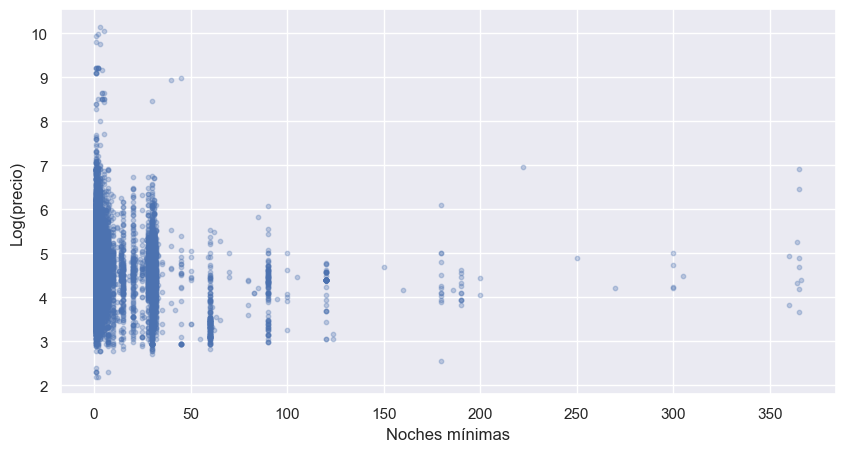

In [186]:
# ahora toca comprobar si el precio varía en base a las características del anuncio (noches mínimas, número de reviews, disponibilidad al año)
df["log_price"] = np.log1p(df["price"])
plt.scatter(
    df["minimum_nights"],
    df["log_price"],
    alpha=0.3,
    s=10
)
plt.xlabel("Noches mínimas")
plt.ylabel("Log(precio)")
plt.show()

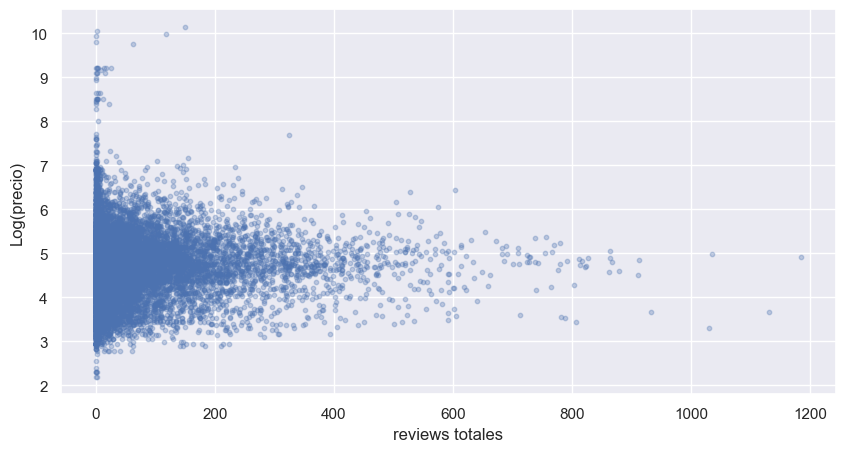

In [187]:
plt.scatter(
    df["number_of_reviews"],
    df["log_price"],
    alpha=0.3,
    s=10
)
plt.xlabel("reviews totales")
plt.ylabel("Log(precio)")
plt.show()

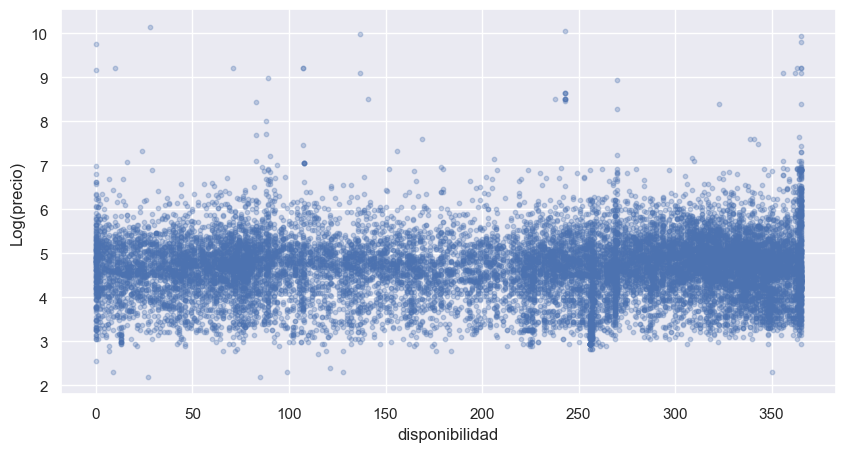

In [188]:
plt.scatter(
    df["availability_365"],
    df["log_price"],
    alpha=0.3,
    s=10
)
plt.xlabel("disponibilidad")
plt.ylabel("Log(precio)")
plt.show()

In [189]:
df[[
    "price",
    "minimum_nights",
    "number_of_reviews",
    "availability_365"
]].corr(method="spearman")

,price,minimum_nights,number_of_reviews,availability_365
price,1.000000,-0.156260,0.076023,0.033426
minimum_nights,-0.156260,1.000000,-0.140099,-0.101158
number_of_reviews,0.076023,-0.140099,1.000000,-0.254846
availability_365,0.033426,-0.101158,-0.254846,1.000000


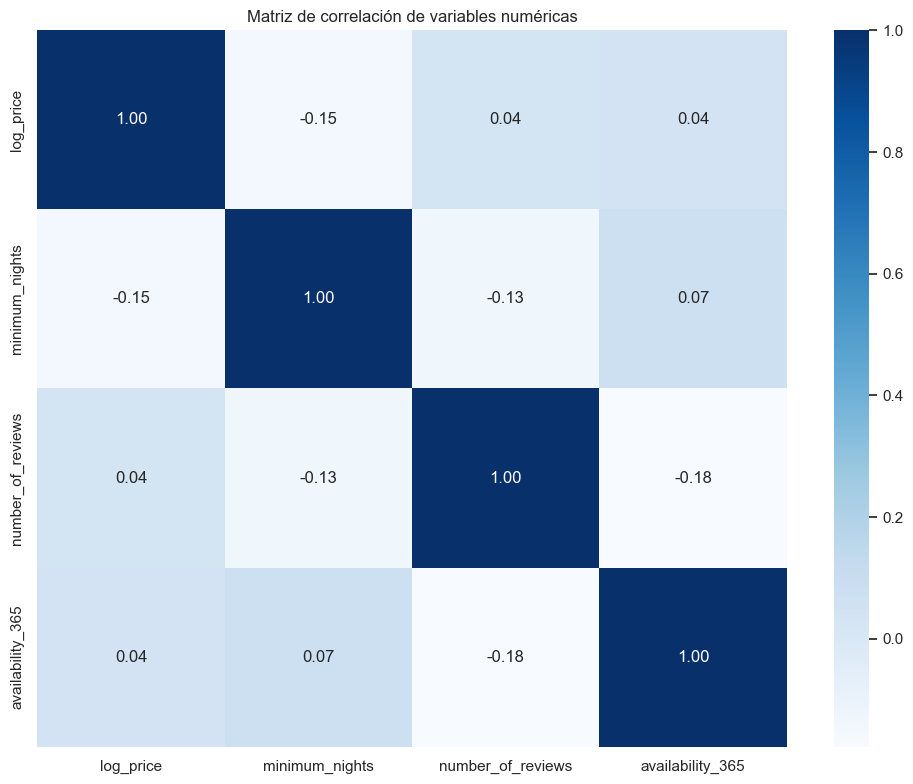

In [190]:
df_corr = df[[
    "log_price",
    "minimum_nights",
    "number_of_reviews",
    "availability_365"
]]

corr = df_corr.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", ax=ax)
ax.set_title("Matriz de correlación de variables numéricas")

fig.tight_layout()

**A continuación, realizamos las pruebas estadísticas de comprobación de hipótesis con las tres variables relacionadas con las características del anuncio y el precio del piso**

In [191]:
# la relación es significativa (p<0.05), es decir existe, pero es muy leve o practicamente insignificante (0.04)
rho, p_value = stats.spearmanr(
    df["log_price"],
    df["availability_365"]
)

rho, p_value

(np.float64(0.0334263246938281), np.float64(1.3595123275075424e-05))

In [192]:
# la relación es significativa (p<0.05), es decir existe, pero es muy leve o practicamente insignificante (-0.18)
rho, p_value = stats.spearmanr(
    df["log_price"],
    df["number_of_reviews"]
)

rho, p_value

(np.float64(0.07602311014368578), np.float64(3.933213435133953e-23))

In [193]:
# la relación es significativa (p<0.05), es decir existe, pero es muy leve o practicamente insignificante (0.07)
rho, p_value = stats.spearmanr(
    df["log_price"],
    df["minimum_nights"]
)

rho, p_value

(np.float64(-0.15626005407679122), np.float64(5.2360515552426826e-93))

**Pregunta 1: ¿Qué barrios concentran más oferta de alojamiento? Diagrama de barras con los diez barrios con mayor número de alojamientos**


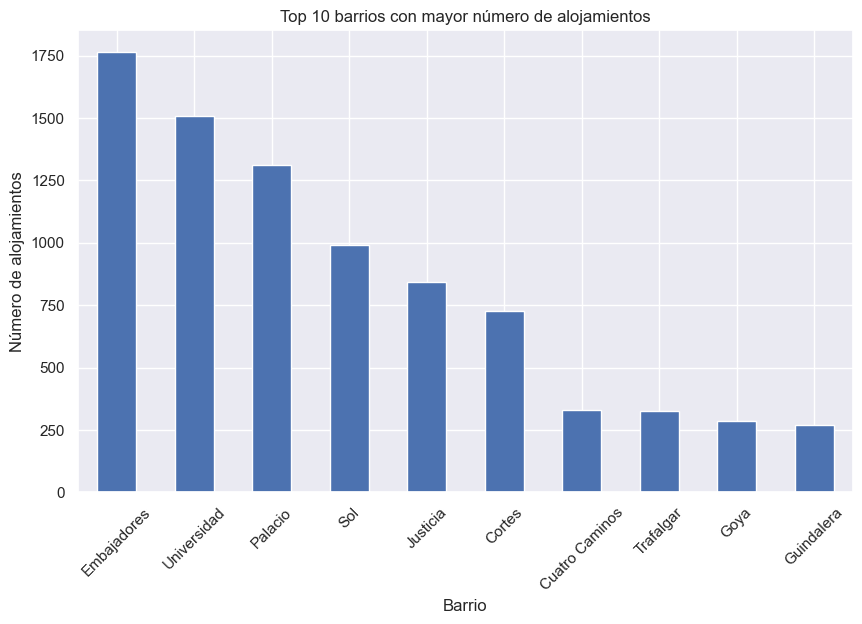

In [ ]:
'''Quedarnos con los 10 barrios con mayor número de alojamientos, y mostrarlo en un diagrama de barras'''
top_barrios = (
    df["neighbourhood"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
top_barrios.plot(kind="bar")
plt.title("Top 10 barrios con mayor número de alojamientos")
plt.xlabel("Barrio")
plt.ylabel("Número de alojamientos")
plt.xticks(rotation=45)
plt.show()

**Mapa de densidad con la ubicación de los pisos en base al mapa de madrid**

In [ ]:
# mapa interactivo es el nombre del archivo donde esta ese mapa, fue sacado debido a que relentizaba la ejecución de esta pestaña

**Pregunta 2: ¿Diferencias entre anfitriones particulares y multi-hosts? Diagrama de barras y diagrama de cajas del número de alojamiento en base al tipo de anfitrión**

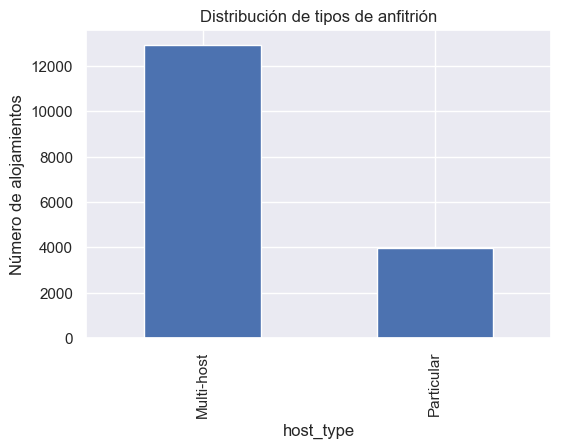

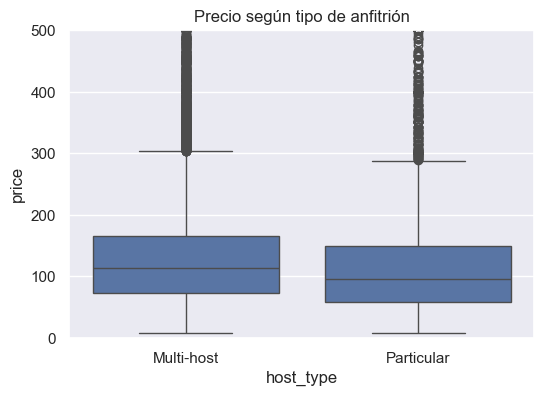

In [ ]:
'''Crear variable tipo de anfitrión'''
df["host_type"] = np.where(
    df["calculated_host_listings_count"] > 1,
    "Multi-host",
    "Particular"
)

'''Distribución de anfitriones'''
plt.figure(figsize=(6,4))
df["host_type"].value_counts().plot(kind="bar")
plt.title("Distribución de tipos de anfitrión")
plt.ylabel("Número de alojamientos")
plt.show()

'''Boxplot de precio'''
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="host_type",
    y="price"
)
plt.ylim(0, 500)
plt.title("Precio según tipo de anfitrión")
plt.show()

**Pregunta 3: ¿Hay zonas sobreexplotadas o zonas infraexplotadas? Relación entre número de reviews y número de alojamientos por barrio**

In [197]:
# voy a crear una variable que refleje las diferencias entre oferta y demanda, asumiremos que en cierto grado, los pisos con más reviews
# son los pisos con más visitas, pese a que sabemos que no es exacto, es la mejor aproximación que podemos hacer 
reviews_por_barrio = (df.groupby("neighbourhood_group")["number_of_reviews_ltm"].sum().rename("total_reviews"))
pisos_por_barrio = (df.groupby("neighbourhood_group").size().rename("total_pisos"))
df_final= pd.concat([reviews_por_barrio,pisos_por_barrio], axis=1)

In [198]:
df_final

,total_reviews,total_pisos
neighbourhood_group,,
Arganzuela,17544.0,789
Barajas,4688.0,85
Carabanchel,8956.0,612
Centro,146305.0,7145
Chamartín,7069.0,604
Chamberí,12056.0,1078
Ciudad Lineal,10305.0,568
Fuencarral - El Pardo,2263.0,209
Hortaleza,5010.0,359


In [199]:
df_final["proporción_review_apartamento"]=df_final["total_reviews"]/df_final["total_pisos"]

In [200]:
df_final.describe()

,total_reviews,total_pisos,proporción_review_apartamento
count,21.000000,21.000000,21.000000
mean,13833.380952,806.238095,16.573929
std,30747.423906,1492.971899,9.447747
min,788.000000,58.000000,9.636943
25%,4688.000000,209.000000,11.703642
50%,5908.000000,465.000000,14.448753
75%,10305.000000,664.000000,17.479290
max,146305.000000,7145.000000,55.152941


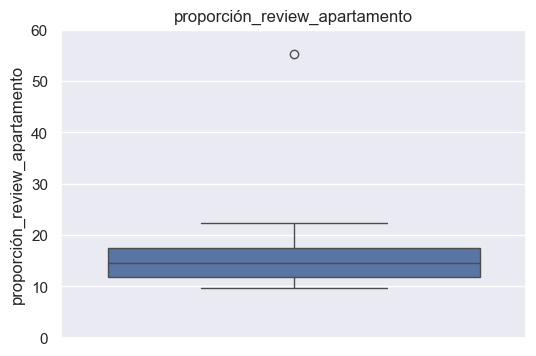

In [201]:
'''Boxplot de precio'''
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_final,
    y="proporción_review_apartamento"
)
plt.ylim(0,60)
plt.title("proporción_review_apartamento")
plt.show()

In [202]:
df_final["agrupación"] = "Adecuada"

df_final.loc[df_final["proporción_review_apartamento"] > 17.4792899408284,"agrupación"] = "Infravalorada"

df_final.loc[df_final["proporción_review_apartamento"] < 11.70364238410596,"agrupación"] = "Sobrevalorada"

**Muestra de los 5 barrios con mayor proporción reviews-apartamentos (infravalorados)**

In [203]:
df_final.loc[df_final["agrupación"]=="Infravalorada"]

,total_reviews,total_pisos,proporción_review_apartamento,agrupación
neighbourhood_group,,,,
Arganzuela,17544.0,789,22.235741,Infravalorada
Barajas,4688.0,85,55.152941,Infravalorada
Centro,146305.0,7145,20.476557,Infravalorada
Ciudad Lineal,10305.0,568,18.142606,Infravalorada
Villa de Vallecas,1327.0,69,19.231884,Infravalorada


**Muestra de los 5 barrios con menor proporción reviews-apartamentos (sobrevalorados)**

In [204]:
df_final.loc[df_final["agrupación"]=="Sobrevalorada"]

,total_reviews,total_pisos,proporción_review_apartamento,agrupación
neighbourhood_group,,,,
Chamberí,12056.0,1078,11.183673,Sobrevalorada
Fuencarral - El Pardo,2263.0,209,10.827751,Sobrevalorada
Moncloa - Aravaca,5423.0,465,11.662366,Sobrevalorada
Moratalaz,1249.0,107,11.672897,Sobrevalorada
Villaverde,1513.0,157,9.636943,Sobrevalorada


## Verificación de hipótesis

**Hipótesis 1**: *Los alojamientos situados en distritos céntricos presentan precios más elevados que los alojamientos en distritos periféricos.*

- A partir del boxplot por `neighbourhood_group` y de la tabla resumen, se observa que los distritos del centro de Madrid (por ejemplo, Centro, Salamanca, Chamberí, etc.) presentan un precio medio significativamente mayor que otros distritos más periféricos. Además la prueba estadística asegura la relación estadísticamente significativa.
- **Conclusión**: la hipótesis 1 se **confirma**. 

---

**Hipótesis 2**: *El tipo de alojamiento influye de forma significativa en el precio por noche.*

- El boxplot por `room_type` muestra diferencias claras entre los tipos de alojamiento.
- Los alojamientos completos (`Entire home/apt`) tienen un precio medio superior a las habitaciones privadas y compartidas. Además la prueba estadística asegura la relación estadísticamente significativa.
- **Conclusión**: la hipótesis 2 se **confirma**.

---

**Hipótesis 3**: *Existe una relación positiva entre las características del anuncio y el precio.*

- Pese a que las pruebas estadísticas confirman la relación, las correlaciones entre las variables a disposición y el precio son demasiado débiles para
ser tenidas en cuenta
- **Conclusión**: la hipótesis 3 no se **confirma** pero tampoco se **niega**.

**Preguntas extra:**
- ¿Qué barrios concentran más oferta de alojamientos? 

    -Embajadores, Universidad, Palacio, Sol, Justicia, Cortes, Cuatro Caminos, Trafalgar, Goya y Guindalera, en orden descendente.
- ¿Qué zonas presentan los precios más altos? 

    -Salamanca, Centro, Chamberí, Retiro, Tetuán, Moncloa, Arganzuela, Hortaleza, Barajas, Ciudad Lineal, en orden descendente.
- ¿Existen diferencias entre anfitriones particulares y multi-hosts?

    -Los multi host abarcan más del 75% de la oferta
- ¿Existen zonas desaprovechadas (zonas con muy poca densidad de oferta pero mucho índice de beneficio)?

    -Si, Arganzuela, Barajas, El centro, Ciudad Lineal y Villa de Vallecas, destacando por mucho Barajas entre ellas.
- ¿Existen zonas sobreexplotadas (zonas con muy mucha densidad de oferta pero poco índice de beneficio)?

    -Si, Chamberí, Fuencarral, Moncloa, Moratalaz y Villaverde

# Conclusiones finales

- La **ubicación** del alojamiento (por distrito) es un factor clave para explicar el precio por noche. Los distritos más céntricos presentan precios más elevados que las zonas periféricas.
- El **tipo de alojamiento** también influye de forma importante: los alojamientos completos son, de media, bastante más caros que las habitaciones privadas o compartidas.
- El análisis confirma las hipótesis planteadas inicialmente y proporciona una visión clara del comportamiento de los precios de los alojamientos turísticos en Madrid publicados en Airbnb.
- Los multi host representan más de tres cuartos de la oferta, concentrándola de manera excepcional
- Existen zonas infraexplotadas y sobreexplotadas, por lo que esto se debe tener en cuenta a la hora de tomar decisiones financieras en el sector